# WEB SCRAPING - VIVAREAL

In [45]:
import re
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

coleta = requests.get('https://www.vivareal.com.br/aluguel/sp/campinas/?__vt=lnv:a&pagina=4#ordenar-por=preco-total:ASC')
coleta.status_code

200

In [87]:
lista_imoveis = []

In [88]:
paginas = int(input("Digite o numero de paginas que deseja extrair: "))

driver = webdriver.Chrome()

driver.get('https://www.vivareal.com.br/aluguel/sp/campinas/?__vt=lnv:a&pagina=2')
sleep(2)

#Varre a quantidade de paginas desejadas 
for n in range (1,paginas,1):
    
    #clica no botão próxima página
    driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="js-site-main"]/div[2]/div[1]/section/div[2]/div[2]/div/ul/li[9]/button'))))
    sleep(10)
    
    page_content = driver.page_source
 
    site = BeautifulSoup(page_content, 'html.parser')
    
    #print(site)
    sleep(10)
    #Coleta a localização da div mãe
    imoveis = site.findAll('article', attrs={'class': 'property-card__container js-property-card'})
    
    #print(imoveis)
    #Busca as tags correspondentes dentro da div mãe
    for n in imoveis:
        

        #coleta ao titulo
        titulo = n.find(class_="property-card__title js-cardLink js-card-title").text.strip()
        
        #coleta o endereco
        endereco = n.find('span', attrs={'class': 'property-card__address'}) 
        
        #coleta o metragem
        metro = n.find(class_="property-card__detail-value js-property-card-value property-card__detail-area js-property-card-detail-area").text.strip()
        
        #coleta o quarto
        quarto = n.find(class_="property-card__detail-item property-card__detail-room js-property-detail-rooms").text.strip()
        quarto.rstrip("Quarto")
        
        #coleta banheiro
        banheiro = n.find(class_="property-card__detail-item property-card__detail-bathroom js-property-detail-bathroom").text.strip() 
        
        #coleta garagem
        garagem = n.find(class_="property-card__detail-item property-card__detail-garage js-property-detail-garages").text.strip() 
        
        #coleta preco
        preco = n.find(class_="property-card__price js-property-card-prices js-property-card__price-small").text.strip() 
        
        #Armazena os dados coletados na div
        lista_imoveis.append([titulo, endereco.text, metro, quarto, banheiro, garagem, preco])



Digite o numero de paginas que deseja extrair: 2


In [36]:
#Cria dataframe
df = pd.DataFrame(lista_imoveis, columns=['Título','Endereço', 'Metro_m2', 'N_Quartos', 'N_Banheiros', 'N_Garagens', 'Valor_Mensal'])
#Salva datraframe em arquivo csv
df.to_csv('vivareal_campinas.csv', index=False)
df.head()


,Título,Endereço,Metro_m2,N_Quartos,N_Banheiros,N_Garagens,Valor_Mensal
0,Casa com 4 Quartos para Venda/Aluguel 224m²,"Jardim Chapadão, Campinas - SP",224,4\n \n\n Quartos,3\n \n\n Banheiros,2\n \n\n Vagas,R$ 4.800\n /Mês\n\n\n ...
1,"Apartamento com 3 Quartos para Aluguel, 91m²","Taquaral, Campinas - SP",91,3\n \n\n Quartos,3\n \n\n Banheiros,2\n \n\n Vagas,R$ 4.300\n /Mês
2,"Casa de condomínio com 3 Quartos para Aluguel,...","Rua Padre Domingos Giovanini, 394 - Parque Taq...",80,3\n \n\n Quartos,2\n \n\n Banheiros,2\n \n\n Vagas,R$ 3.200\n /Mês
3,Apartamento com 3 Quartos para Venda/Aluguel 1...,Avenida Maria Emília Alves dos Santos de Ângel...,134,3\n \n\n Quartos,5\n \n\n Banheiros,3\n \n\n Vagas,R$ 4.500\n /Mês\n\n\n ...
4,Casa com 3 Quartos para Venda/Aluguel 285m²,"Rua João Batista Signori, 115 - Vila Nova, Cam...",285,3\n \n\n Quartos,2\n \n\n Banheiros,2\n \n\n Vagas,R$ 2.900\n /Mês\n\n\n ...


# Parte 2 - Análise Exploratória dos Dados

In [52]:
df = pd.read_csv('vivareal_campinas.csv')
df.shape[0] 

3564

In [53]:
df.head()

,Título,Endereço,Metro_m2,N_Quartos,N_Banheiros,N_Garagens,Valor_Mensal
0,Casa com 4 Quartos para Venda/Aluguel 224m²,"Jardim Chapadão, Campinas - SP",224,4\n \n\n Quartos,3\n \n\n Banheiros,2\n \n\n Vagas,R$ 4.800\n /Mês\n\n\n ...
1,"Apartamento com 3 Quartos para Aluguel, 91m²","Taquaral, Campinas - SP",91,3\n \n\n Quartos,3\n \n\n Banheiros,2\n \n\n Vagas,R$ 4.300\n /Mês
2,"Casa de condomínio com 3 Quartos para Aluguel,...","Rua Padre Domingos Giovanini, 394 - Parque Taq...",80,3\n \n\n Quartos,2\n \n\n Banheiros,2\n \n\n Vagas,R$ 3.200\n /Mês
3,Apartamento com 3 Quartos para Venda/Aluguel 1...,Avenida Maria Emília Alves dos Santos de Ângel...,134,3\n \n\n Quartos,5\n \n\n Banheiros,3\n \n\n Vagas,R$ 4.500\n /Mês\n\n\n ...
4,Casa com 3 Quartos para Venda/Aluguel 285m²,"Rua João Batista Signori, 115 - Vila Nova, Cam...",285,3\n \n\n Quartos,2\n \n\n Banheiros,2\n \n\n Vagas,R$ 2.900\n /Mês\n\n\n ...


In [54]:
#Remove valores duplicados
df = df.drop_duplicates()
df.shape[0] 

2967

In [55]:
#Remove todas strings das colunas definidas 
df['N_Banheiros'] = df['N_Banheiros'].str.extract('(\d+)', expand=False)
df['N_Garagens'] = df['N_Garagens'].str.extract('(\d+)', expand=False)
df['N_Quartos'] = df['N_Quartos'].str.extract('(\d+)', expand=False)

df["Valor_Mensal"] = df["Valor_Mensal"].astype(str)
df["Valor_Mensal"] = df["Valor_Mensal"].str.replace('.', '')
df['Valor_Mensal'] = df['Valor_Mensal'].str.extract('(\d+)', expand=False)
#df.head()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 3563
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Título        2967 non-null   object
 1   Endereço      2967 non-null   object
 2   Metro_m2      2967 non-null   int64 
 3   N_Quartos     2508 non-null   object
 4   N_Banheiros   2833 non-null   object
 5   N_Garagens    2559 non-null   object
 6   Valor_Mensal  2967 non-null   object
dtypes: int64(1), object(6)
memory usage: 185.4+ KB


In [57]:
#Substitui campos 'Nan' por 0
df = df.fillna(0)
#Converte a coluna para int
df = df.astype({'N_Quartos' : 'int',
               'N_Banheiros' : 'int',
               'N_Garagens' : 'int',
               'Valor_Mensal' : 'int'})

In [58]:
df.describe()

,Metro_m2,N_Quartos,N_Banheiros,N_Garagens,Valor_Mensal
count,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
mean,303.655881,2.273677,2.584429,3.017526,6691.963263
std,1603.358550,2.186806,2.191644,7.098932,25155.327494
min,0.000000,0.000000,0.000000,0.000000,100.000000
25%,60.000000,1.000000,1.000000,1.000000,1500.000000
50%,98.000000,2.000000,2.000000,2.000000,2900.000000
75%,240.000000,3.000000,3.000000,3.000000,6000.000000
max,42944.000000,50.000000,46.000000,176.000000,820000.000000


### Quantidade de Linhas(Dados)

In [59]:
df.shape[0] 

2967

### Moradias Agrupadas por Metragem

In [60]:
df.Metro_m2.value_counts()

50      116
60       75
70       71
40       63
45       58
       ... 
174       1
488       1
374       1
1300      1
1104      1
Name: Metro_m2, Length: 534, dtype: int64

(-0.5, 19.5)

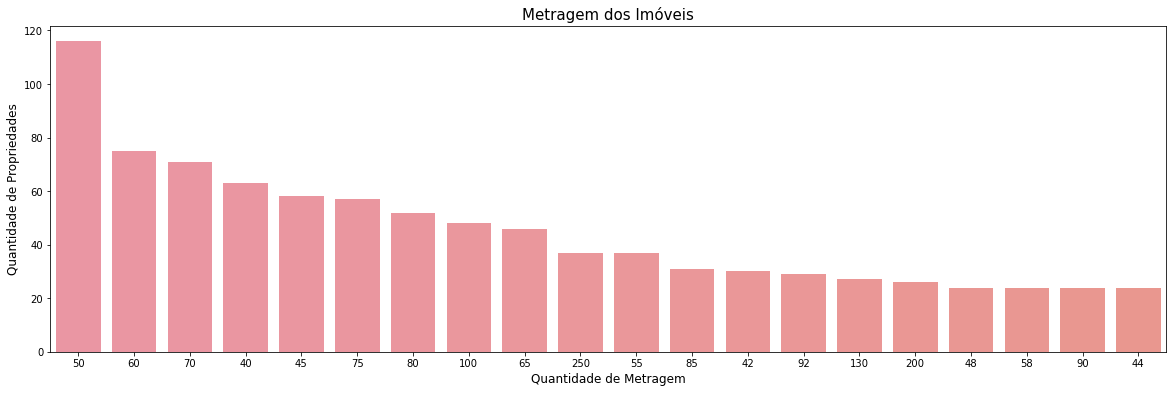

In [61]:
fig = plt.figure(figsize=(20,6))
sns.countplot(x='Metro_m2',order=df['Metro_m2'].value_counts().index,data=df)

plt.title('Metragem dos Imóveis',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Quantidade de Metragem',fontsize=12)
plt.xlim(-0.5,19.5)

### Moradias Agrupadas por Número de Banheiros

In [62]:
df.N_Banheiros.value_counts()

1     900
2     779
3     424
4     274
5     246
0     134
6      88
7      60
8      32
10     10
9       6
11      4
15      3
12      2
30      1
13      1
20      1
32      1
46      1
Name: N_Banheiros, dtype: int64

Text(0.5, 0, 'Quantidade de Banheiro')

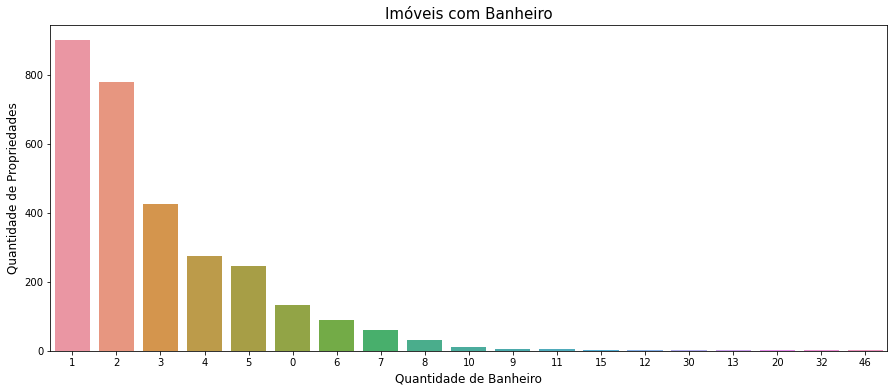

In [63]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='N_Banheiros',order=df['N_Banheiros'].value_counts().index,data=df)

plt.title('Imóveis com Banheiro',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Quantidade de Banheiro',fontsize=12)


### Moradias Agrupadas por Número de Quartos

In [64]:
df.N_Quartos.value_counts()

3     904
2     649
1     544
0     459
4     262
5      62
6      27
8      18
7      17
10      6
9       5
11      2
15      2
16      2
13      1
36      1
19      1
12      1
50      1
28      1
22      1
40      1
Name: N_Quartos, dtype: int64

Text(0.5, 0, 'Quantidade de Quartos')

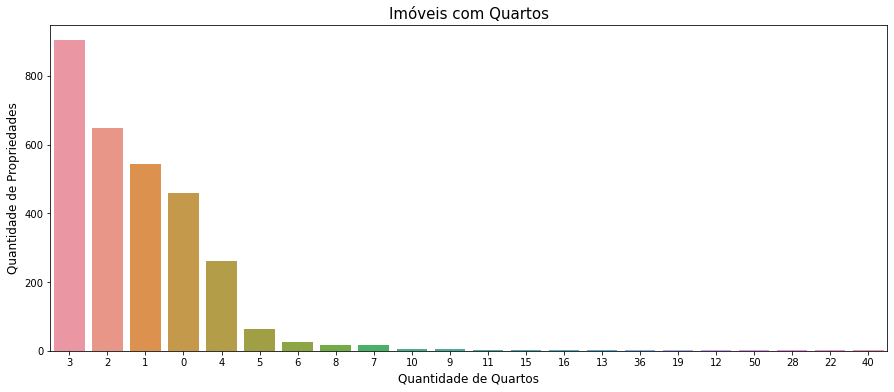

In [65]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='N_Quartos',order=df['N_Quartos'].value_counts().index,data=df)

plt.title('Imóveis com Quartos',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Quantidade de Quartos',fontsize=12)

### Moradias Agrupadas por Número de Vagas

In [66]:
df.N_Garagens.value_counts()

1      956
2      632
0      408
4      370
3      252
6       99
5       68
8       36
10      29
12      18
7       16
20       9
9        8
25       7
15       7
50       7
30       6
14       5
16       4
13       3
40       2
18       2
70       1
72       1
100      1
11       1
23       1
80       1
26       1
28       1
46       1
17       1
64       1
19       1
35       1
60       1
90       1
37       1
38       1
22       1
55       1
145      1
63       1
176      1
29       1
Name: N_Garagens, dtype: int64

(-0.5, 19.5)

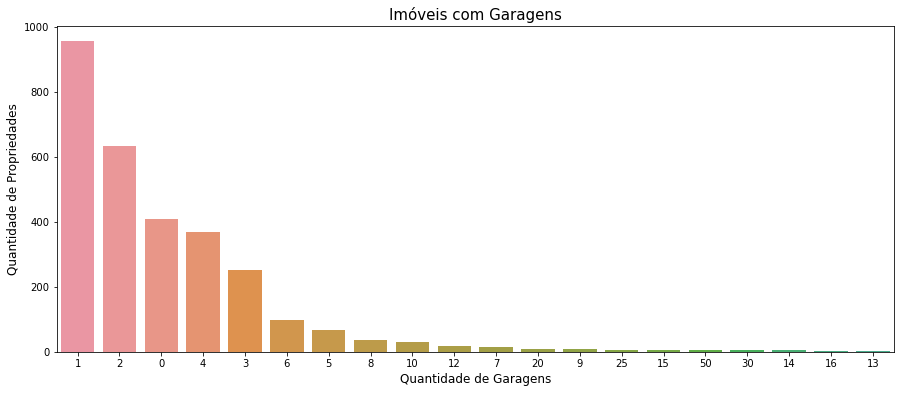

In [67]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='N_Garagens',order=df['N_Garagens'].value_counts().index,data=df)

plt.title('Imóveis com Garagens',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Quantidade de Garagens',fontsize=12)
plt.xlim(-0.5,19.5)

## Ocorrências

**Ocorrência de Metragem**

In [20]:
df.Metro_m2.value_counts() / df.shape[0]

50      0.039097
60      0.025278
70      0.023930
40      0.021234
45      0.019548
          ...   
174     0.000337
488     0.000337
374     0.000337
1300    0.000337
1104    0.000337
Name: Metro_m2, Length: 534, dtype: float64

**Ocorrência de Banheiros**

In [71]:
df.N_Banheiros.value_counts() / df.shape[0]

1     0.303337
2     0.262555
3     0.142905
4     0.092349
5     0.082912
0     0.045163
6     0.029660
7     0.020222
8     0.010785
10    0.003370
9     0.002022
11    0.001348
15    0.001011
12    0.000674
30    0.000337
13    0.000337
20    0.000337
32    0.000337
46    0.000337
Name: N_Banheiros, dtype: float64

**Ocorrência de Quartos**

In [72]:
df.N_Quartos.value_counts() / df.shape[0]

3     0.304685
2     0.218739
1     0.183350
0     0.154702
4     0.088305
5     0.020897
6     0.009100
8     0.006067
7     0.005730
10    0.002022
9     0.001685
11    0.000674
15    0.000674
16    0.000674
13    0.000337
36    0.000337
19    0.000337
12    0.000337
50    0.000337
28    0.000337
22    0.000337
40    0.000337
Name: N_Quartos, dtype: float64

**Ocorrência de Garagens**

In [73]:
df.N_Garagens.value_counts() / df.shape[0]

1      0.322211
2      0.213010
0      0.137513
4      0.124705
3      0.084934
6      0.033367
5      0.022919
8      0.012133
10     0.009774
12     0.006067
7      0.005393
20     0.003033
9      0.002696
25     0.002359
15     0.002359
50     0.002359
30     0.002022
14     0.001685
16     0.001348
13     0.001011
40     0.000674
18     0.000674
70     0.000337
72     0.000337
100    0.000337
11     0.000337
23     0.000337
80     0.000337
26     0.000337
28     0.000337
46     0.000337
17     0.000337
64     0.000337
19     0.000337
35     0.000337
60     0.000337
90     0.000337
37     0.000337
38     0.000337
22     0.000337
55     0.000337
145    0.000337
63     0.000337
176    0.000337
29     0.000337
Name: N_Garagens, dtype: float64

# Blox Plot #

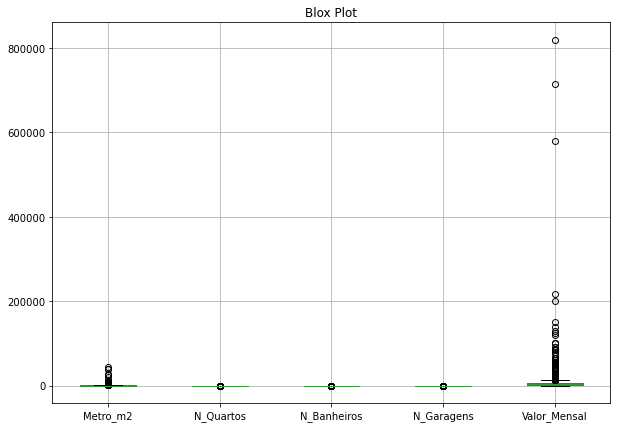

In [74]:
df.boxplot(figsize=(10,7))
plt.title("Blox Plot")
plt.show()

# Histograma #

array([[<AxesSubplot:title={'center':'Metro_m2'}>,
        <AxesSubplot:title={'center':'N_Quartos'}>],
       [<AxesSubplot:title={'center':'N_Banheiros'}>,
        <AxesSubplot:title={'center':'N_Garagens'}>],
       [<AxesSubplot:title={'center':'Valor_Mensal'}>, <AxesSubplot:>]],
      dtype=object)

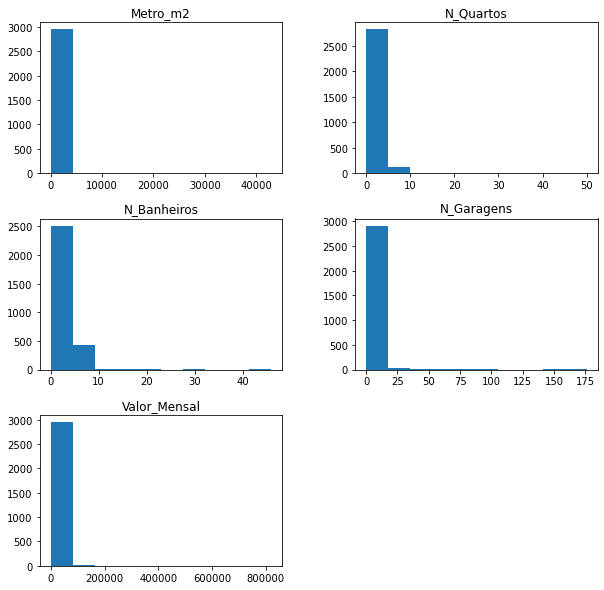

In [75]:
df.hist(grid=False, figsize=(10,10))

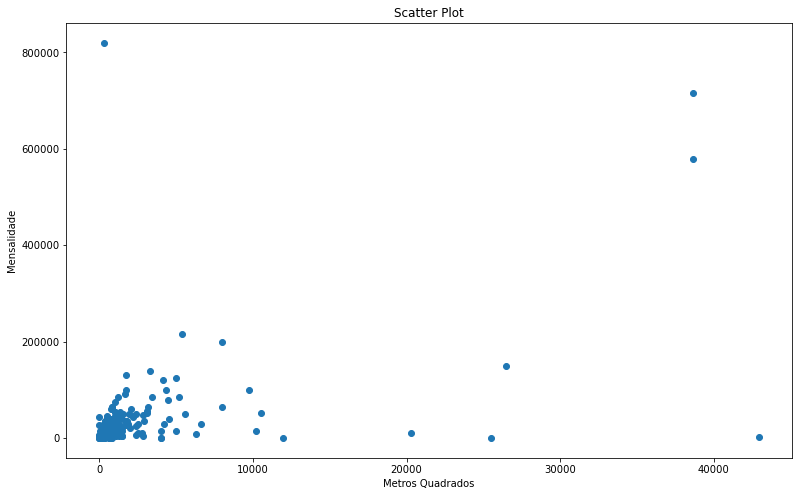

In [78]:
plt.figure(figsize=(13,8))
plt.scatter(df['Metro_m2'],  df['Valor_Mensal'])
plt.title('Scatter Plot')
plt.xlabel('Metros Quadrados')
plt.ylabel('Mensalidade')
plt.show()

# Mensalidade

In [27]:
df.Valor_Mensal.value_counts()

1500     85
3500     83
2500     81
1200     78
1000     75
         ..
4250      1
12800     1
2990      1
1165      1
8640      1
Name: Valor_Mensal, Length: 383, dtype: int64

(-0.5, 9.5)

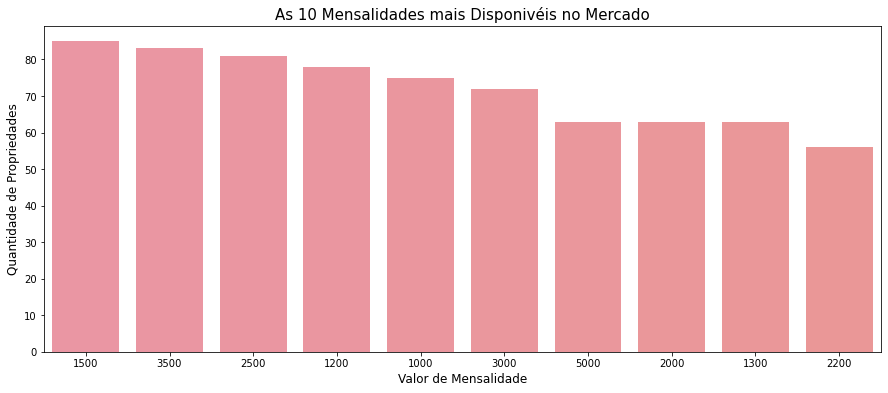

In [79]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='Valor_Mensal',order=df['Valor_Mensal'].value_counts().index,data=df)

plt.title('As 10 Mensalidades mais Disponivéis no Mercado',fontsize=15)
plt.ylabel('Quantidade de Propriedades',fontsize=12)
plt.xlabel('Valor de Mensalidade',fontsize=12)

plt.xlim(-0.5,9.5)

# Correlação

In [80]:
corr_df = df.corr()
print("Correlação:")
print(corr_df, "\n")

Correlação:
              Metro_m2  N_Quartos  N_Banheiros  N_Garagens  Valor_Mensal
Metro_m2      1.000000   0.028799     0.121576    0.437679      0.547019
N_Quartos     0.028799   1.000000     0.461018    0.155476      0.123946
N_Banheiros   0.121576   0.461018     1.000000    0.361453      0.180719
N_Garagens    0.437679   0.155476     0.361453    1.000000      0.395334
Valor_Mensal  0.547019   0.123946     0.180719    0.395334      1.000000 



<AxesSubplot:>

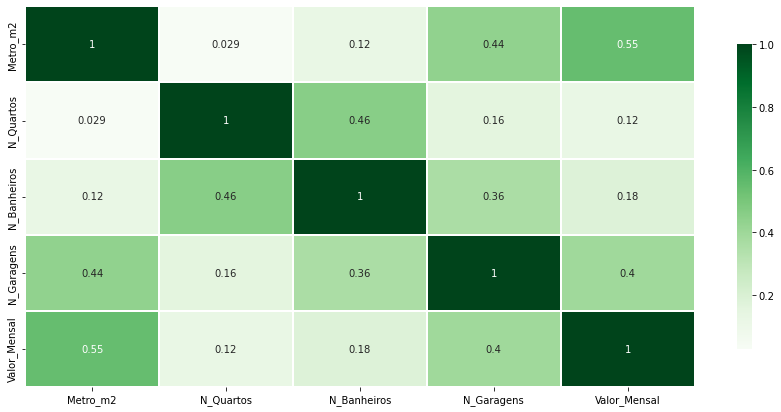

In [81]:
plt.figure(figsize = (15,7))
sns.heatmap(df[corr_df.index].corr(), cmap='Greens', linewidth=0.3, annot=True, cbar_kws={"shrink": .8})